# Installation
**Note:** I have provided two versions of the project, one with jupyter notebook and the other with .py files. The juypter file is a combination of two python files, one with model code and one with data visualizations based on the dataset. The juypter file takes select few of the data visualizations created in the python file and analyzes them. **(The code may take some time to run)**

**Step 1: Install Python (if not installed)**

Go to the official Python website.
Download the latest version of Python for your operating system (Windows, macOS, or Linux).

Follow the installation instructions on the website. Make sure to check the option to "Add Python to PATH" during the installation process.

If you want to run the Juypter Notebook:

**Install Juypter Notebook:**
pip install notebook

**Juypter notebook:**

Please install the following libaries:

%pip install pandas

%pip install numpy

%pip install matplotlib

%pip install seaborn

%pip install scikit-learn

%pip install tensorflow

**To open the project as a juypter notebook:**

juypter notebook (make sure you are in directory where the file is)

**To run the file click run on the cells. (in order of the cells)**

 **Python Script:**

Please install the following libaries:

pip install pandas

pip install numpy

pip install matplotlib

pip install seaborn

pip install scikit-learn

pip install tensorflow

**To run the project as a python script:**

**python** projectname


# Diabetes Data Analysis and Classification

This notebook demonstrates:
1. **Exploratory Data Analysis (EDA)**: Understanding the dataset through visualizations.
2. **Feature Importance**: Identifying significant features using Random Forest.
3. **Model Building and Evaluation**: Comparing three models (Random Forest, SVM, and LSTM) for diabetes prediction.

### Dataset
The dataset used is the Pima Indians Diabetes Database. The dataset can be found at kaggle.com with this link https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv.
**Note:** You must have an account to download.

- **Features**: Medical diagnostic measurements.
- **Target**: `Outcome` (0 = Non-Diabetic, 1 = Diabetic).


### Introduction
The goal of this project is to  implement 3 different classification algorithms in Python. This specfic project uses the Random Forest, SVM, LSTM.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, brier_score_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
# Load the dataset
data = pd.read_csv('diabetes.csv')  # Replace with actual path if needed





## Exploratory Data Analysis (EDA)

The following visualizations provide insights into the data distribution and relationships among features.


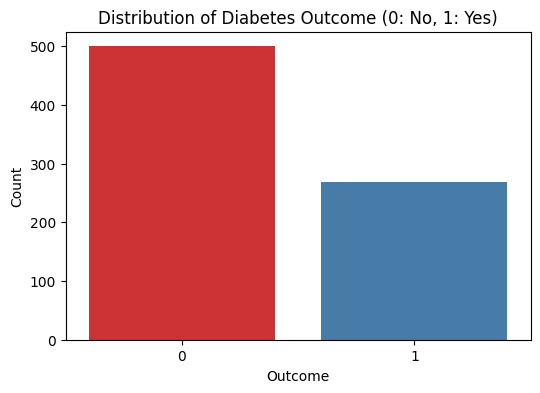

In [2]:
# Distribution of Target Variable (Outcome)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data, palette='Set1')
plt.title('Distribution of Diabetes Outcome (0: No, 1: Yes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

The distribution of diabetes outcome shows that the dataset had more people that did not have diabetes then people who did have diabites.  

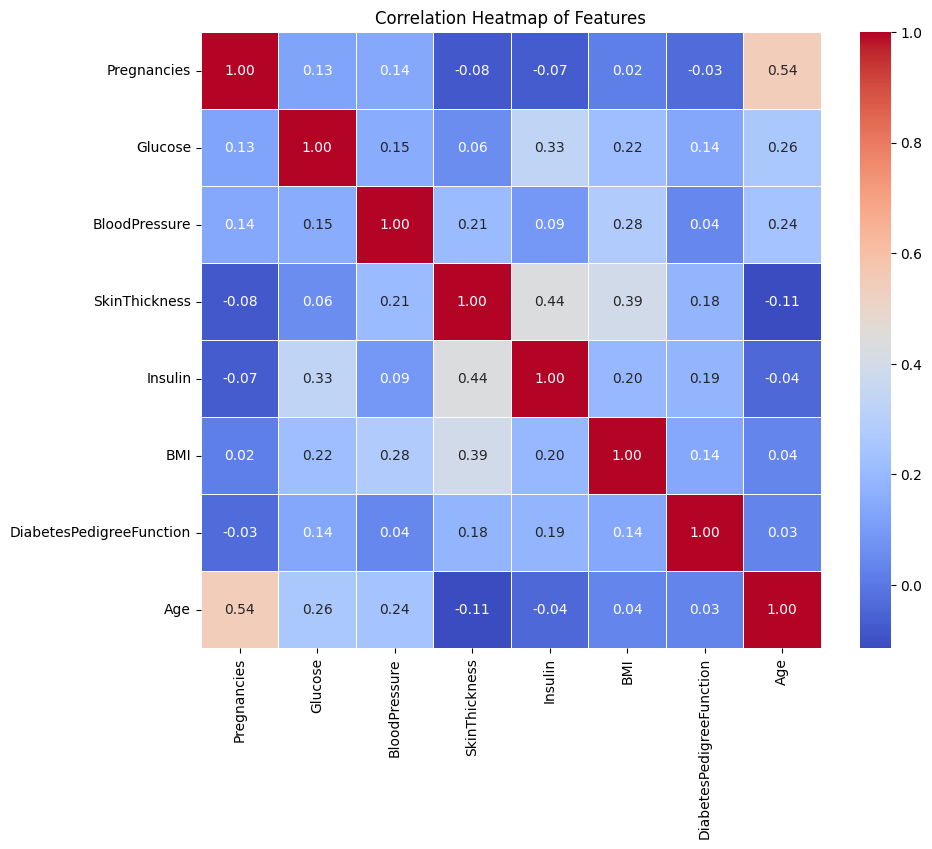

In [3]:
# Correlation Heatmap
correlation_matrix = data.drop('Outcome', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Some observations from the correlation heatmap above are:

Pregnancies and Age
* There is a moderate positive correlation (0.54) between Pregnancies and Age.

Glucose and Insulin
* There is a moderate positive correlation (0.33) between Glucose and Insulin, which suggests that higher glucose levels are associated with higher insulin levels.


Skin Thickness and Insulin
* The correlation between Skin Thickness and Insulin is also moderately positive (0.44) which may imply that individuals with higher skinfold thickness have higher insulin levels.

BMI and Skin Thickness
* There is a positive correlation (0.39) between BMI and Skin Thickness which
suggests that individuals with higher BMI also tend to have higher skinfold thickness.








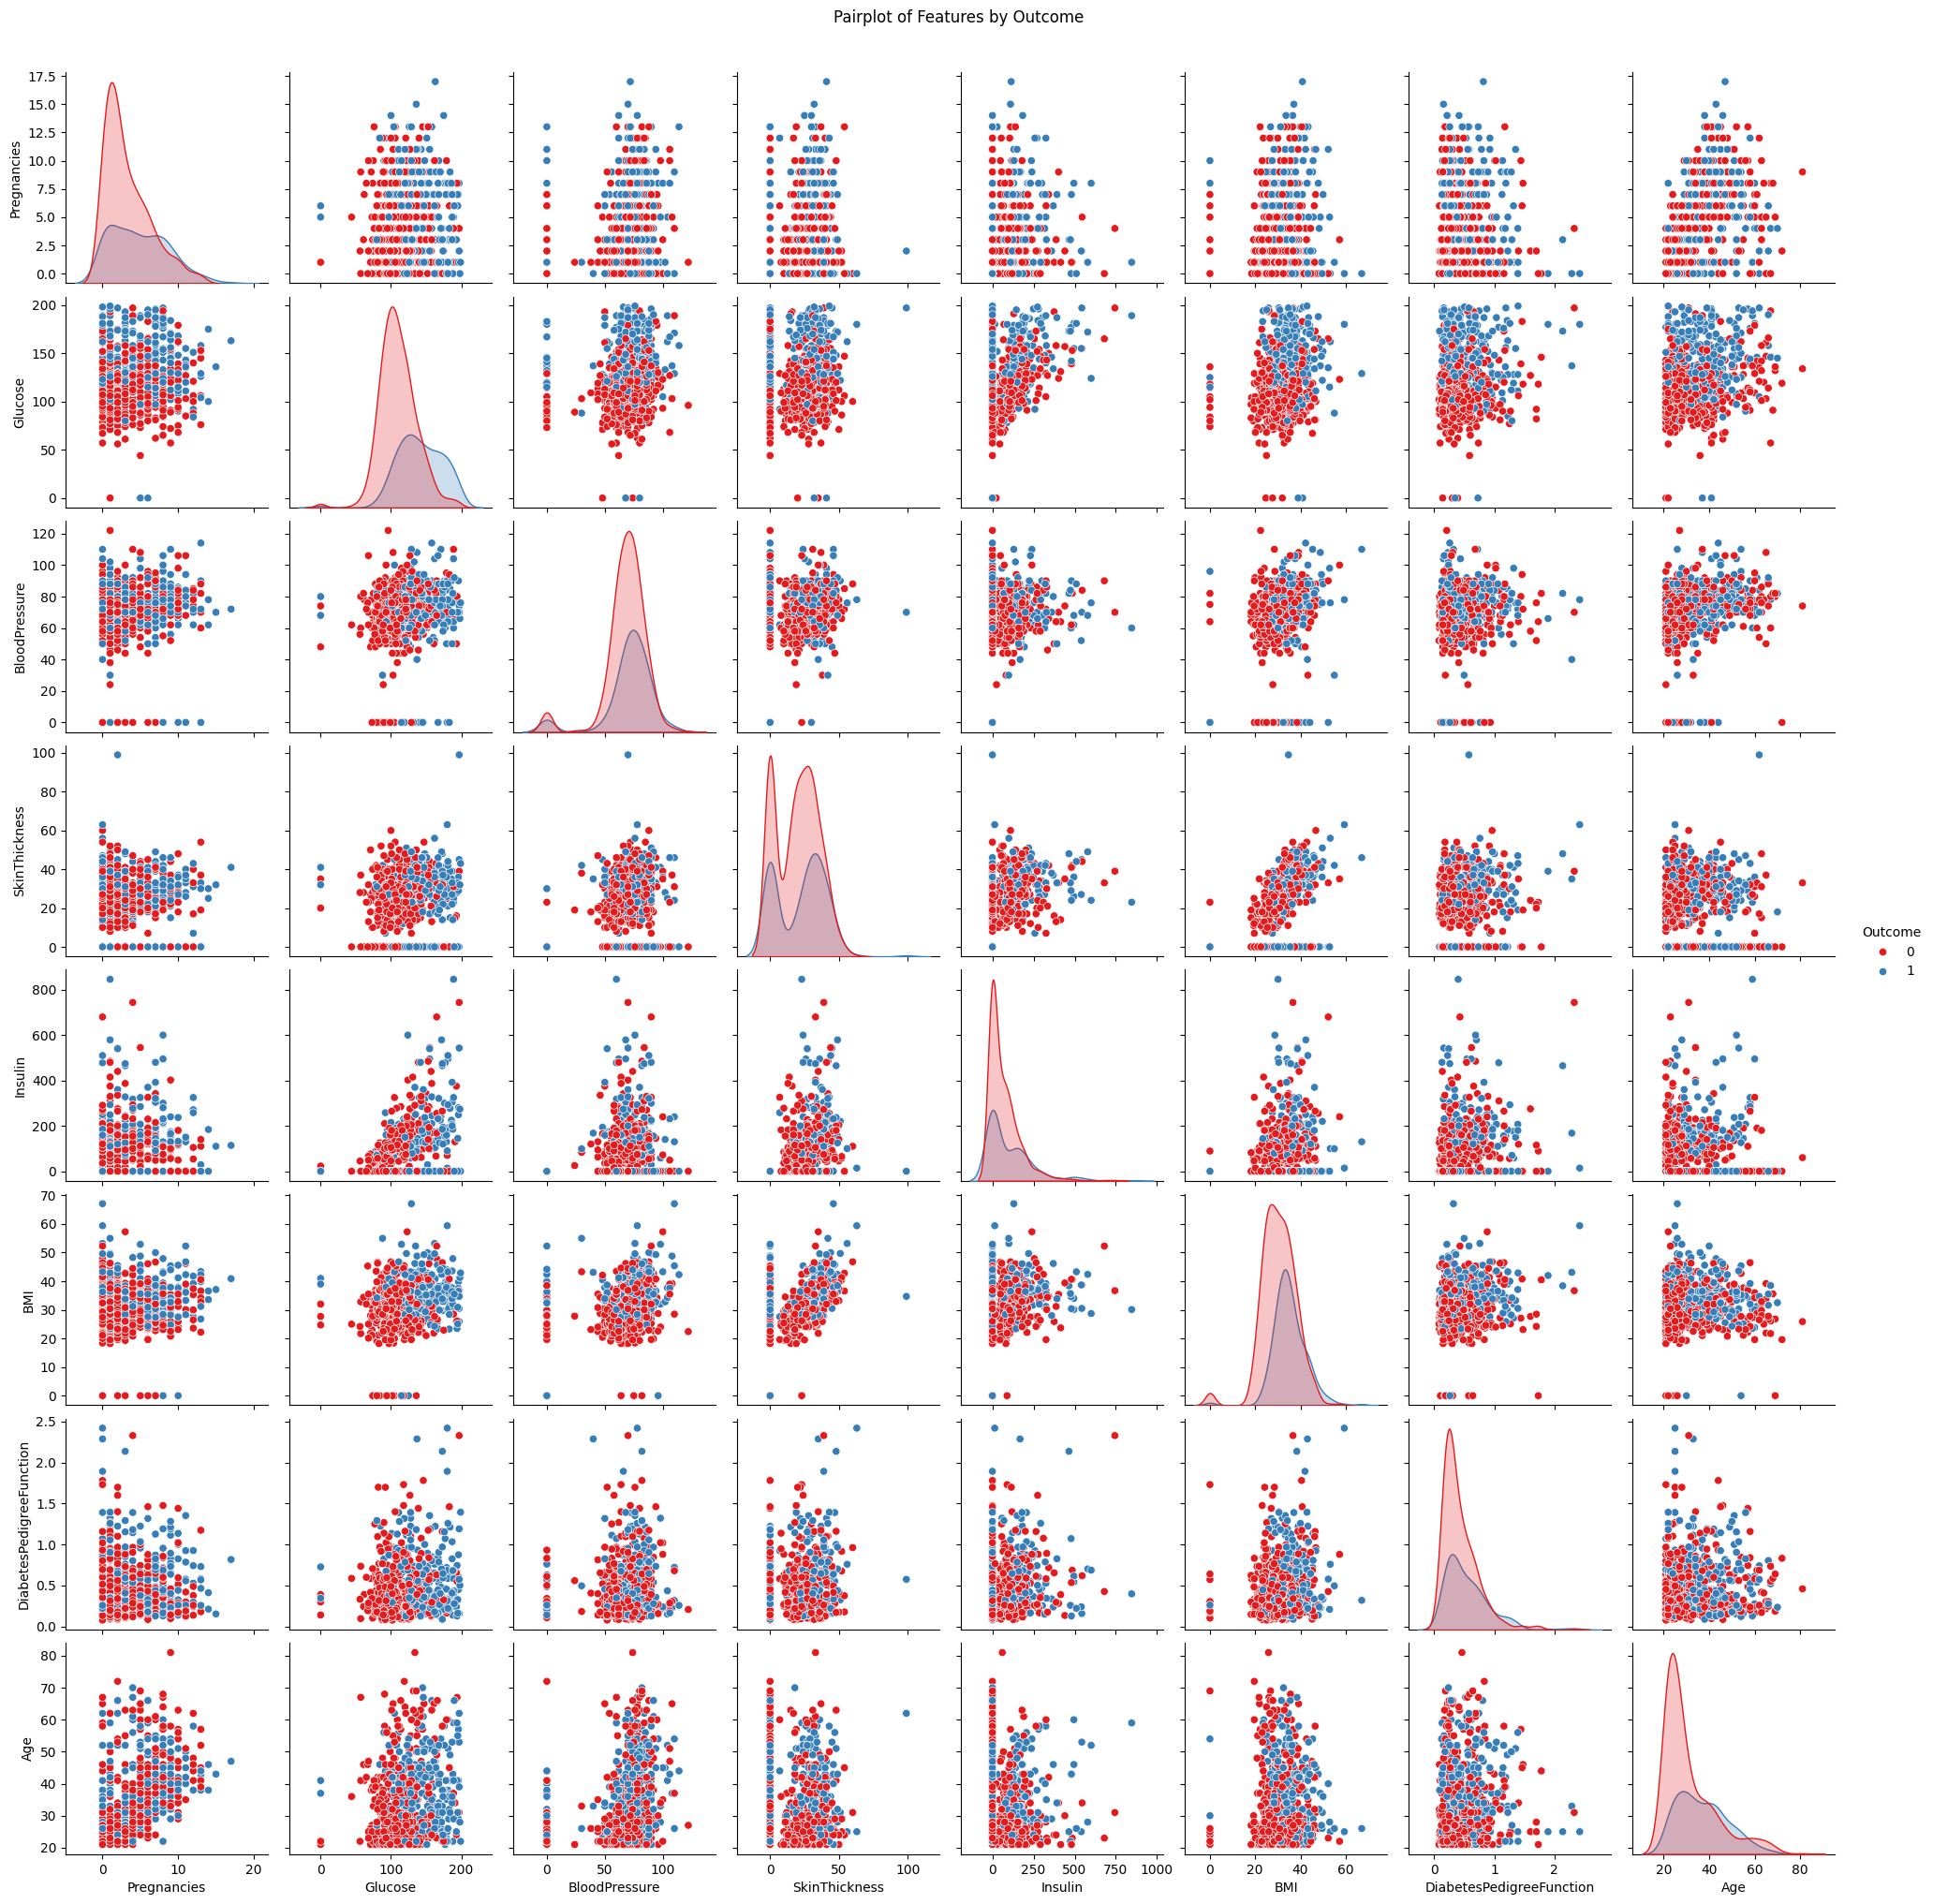

In [4]:
# Pairplot by Outcome
sns.pairplot(data, hue='Outcome', diag_kind='kde', palette='Set1')
plt.suptitle('Pairplot of Features by Outcome', y=1.02)
plt.show()

Some intresting observations from the scatterplot diagram above are :
* The scatter plot shows the distribution of individual features such as pregnancies, glucose, and blood pressure as kernel density estimates
* Glucose shows a clear separation between the two outcome groups with outcome 1 skewing towards higher glucose values which suggests that individuals with higher glucose levels are likely to have diabetes.
* The scatterplot between BMI and Glucose shows that higher glucose and BMI levels are more prevalent among individuals with diabetes






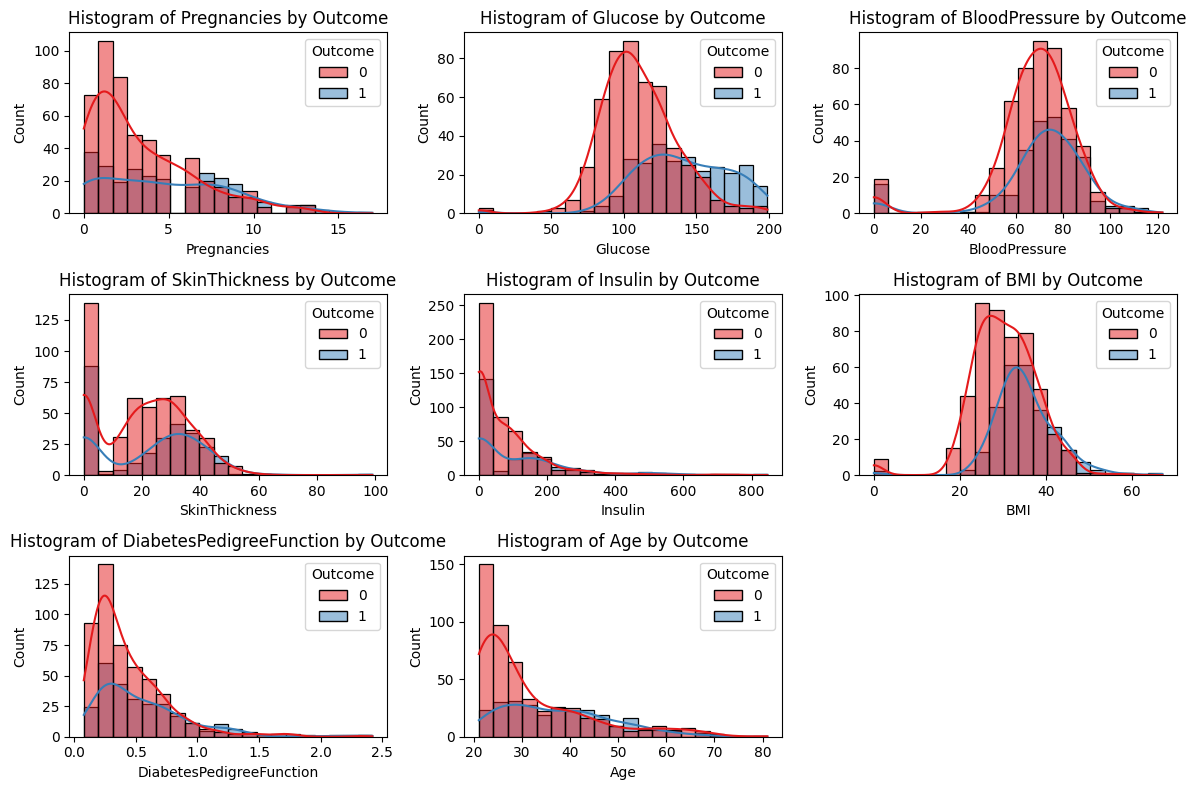

In [5]:
# Boxplots for Feature Distribution by Outcome
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=feature, hue='Outcome', kde=True, palette='Set1', bins=20)
    plt.title(f'Histogram of {feature} by Outcome')

plt.tight_layout()
plt.show()

Some observations from the histogram above are:
* The histogram for pregnancies suggests that there are higher number of pregnancies associated with diabetes
* The histogram for glucose shows that significant shift towards higher glucose levels for outcome 1 which is having diabetes while red which is not having diabetes has a more centralized distribution peaking around 100.
* The histogram for blood pressure shows that both outcomes have a similar distribution with a peak around 70-80. Since there is no clear separation between the two outcome groups which suggests that blood pressure might not be a strong differentiator.
* The histogram for skin thickness shows that diabetes has a wider spread, indicating that higher skin thickness values could be more common in people with diabetes.
* The histogram for insulin shows that there is large portion of red has lower insulin levels, whereas outcome 1 shows a boarder spread, with more instances of higher insulin levels.
* The histogram for BMI shows there is a visible shift in the distribution outcome 1 towards higher BMI values, and the peak for outcome 0 is slightly lower compared for outcome 1, suggesting that higher BMI could be an indicator for the positive outcome.
* The histogram for diabetes pedigree function shows that outcome 1 has a slight tilt towards higher values, indicating that individuals with a higher pedigree function are more likely to have outcome 1.
* The histogram for age shows that outcome 0 has a larger number of younger individuals, while outcome 1 has a distribution spread towards older ages. This implies that age could be a factor, with older individuals potentially being at higher risk.











## Feature Importance

Using a Random Forest classifier, we evaluate the importance of each feature in predicting the outcome.


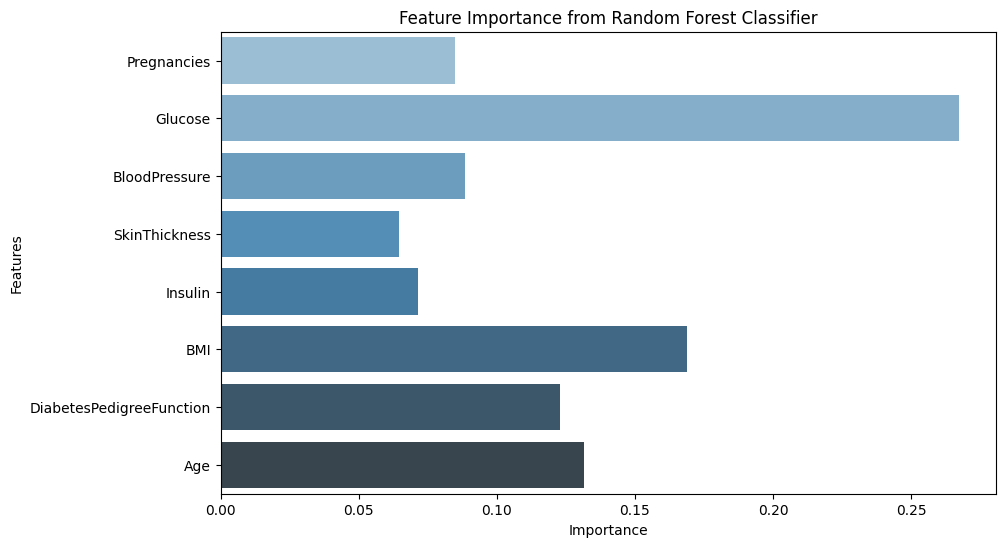

In [6]:

X = data.drop('Outcome', axis=1)
y = data['Outcome']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importances
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='Blues_d')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Some observations from the bargraph above are:
* The most important feature for predicting the Outcome is Glucose, with the highest importance score. This aligns with the scatterplots and histograms, where higher glucose levels were strongly associated with positive outcomes
* BMI is the second most important feature. Individuals with higher BMI levels were more likely to have Outcome 1, as seen in the scatterplots and histograms.
* Age is the third most important feature, reflecting its influence on the likelihood of a positive outcome. Older individuals were observed to have a higher association with Outcome 1, potentially due to cumulative risk factors over time.
* The DiabetesPedigreeFunction measures hereditary risk. Its moderate importance suggests that family history contributes to predicting the outcome but is less critical than glucose, BMI, and age.






## Model Building and Evaluation

Three models are evaluated using 10-fold cross-validation:
1. **Random Forest**
2. **Support Vector Machine (SVM)**
3. **LSTM (Long Short-Term Memory Neural Network)**

Performance metrics include accuracy, precision, recall, F1 score, and AUC.


In [ ]:
# Load and preprocess the dataset
data = pd.read_csv('diabetes.csv')  # Replace with actual path if needed
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable


# Encode target if it's not numerical (e.g., 0 or 1)
y = pd.factorize(y)[0]

# Define 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize structures to collect metrics
metrics_dict = {"RandomForest": [], "SVM": [], "LSTM": []}

# Function to calculate metrics based on TP, TN, FP, FN, and predictions
def calculate_metrics(TP, TN, FP, FN, y_test, y_pred, y_pred_probs=None):
    # Calculate basic metrics
    TPR = TP / (TP + FN) if TP + FN > 0 else 0  # True Positive Rate (Recall)
    TNR = TN / (TN + FP) if TN + FP > 0 else 0  # True Negative Rate
    FPR = FP / (FP + TN) if FP + TN > 0 else 0  # False Positive Rate
    FNR = FN / (FN + TP) if FN + TP > 0 else 0  # False Negative Rate
    Precision = TP / (TP + FP) if TP + FP > 0 else 0  # Precision
    F1_measure = 2 * (Precision * TPR) / (Precision + TPR) if Precision + TPR > 0 else 0  # F1 Score
    Accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
    Error_rate = (FP + FN) / (TP + TN + FP + FN)  # Error Rate
    BACC = (TPR + TNR) / 2  # Balanced Accuracy
    TSS = TPR - FPR  # True Skill Statistic
    HSS = (2 * (TP * TN - FP * FN)) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))  # Heidke Skill Score

    # Brier Score and AUC require predicted probabilities
    if y_pred_probs is not None:
        Brier_score = brier_score_loss(y_test, y_pred_probs)  # Brier Score
        AUC = roc_auc_score(y_test, y_pred_probs)  # AUC (Area Under Curve)
    else:
        Brier_score = None
        AUC = None

    return TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC

# Model 1: Random Forest Classifier
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_pred_probs = rf.predict_proba(X_test)[:, 1]  # Probability of the positive class

    # Confusion matrix
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

    # Calculate and store metrics
    TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC = calculate_metrics(
        TP, TN, FP, FN, y_test, y_pred, y_pred_probs)

    metrics_dict["RandomForest"].append([TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC])

# Model 2: Support Vector Machine (SVM)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm = SVC(kernel='linear', probability=True, random_state=42)  # Enable probability estimation
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    y_pred_probs = svm.predict_proba(X_test)[:, 1]  # Probability of the positive class

    # Confusion matrix
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

    # Calculate and store metrics
    TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC = calculate_metrics(
        TP, TN, FP, FN, y_test, y_pred, y_pred_probs)

    metrics_dict["SVM"].append([TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC])

# Model 3: LSTM (Deep Learning)
X_lstm = np.expand_dims(X.values, axis=-1)  # Expand dimensions for LSTM input
y_lstm = to_categorical(y)  # One-hot encode labels for neural network

# Define the LSTM model **outside** the loop to avoid retracing
lstm_model = Sequential([
    Input(shape=(X_lstm.shape[1], 1)),  # Using Input layer for shape
    LSTM(50),
    Dense(2, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Cross-validation loop for LSTM
for train_index, test_index in kf.split(X_lstm, np.argmax(y_lstm, axis=1)):
    X_train, X_test = X_lstm[train_index], X_lstm[test_index]
    y_train, y_test = y_lstm[train_index], y_lstm[test_index]

    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred = np.argmax(lstm_model.predict(X_test), axis=1)
    y_test = np.argmax(y_test, axis=1)

    # Get predicted probabilities for AUC and Brier score
    y_pred_probs = lstm_model.predict(X_test)[:, 1]  # Assuming binary classification

    # Confusion matrix
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

    # Calculate and store metrics
    TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC = calculate_metrics(
        TP, TN, FP, FN, y_test, y_pred, y_pred_probs)

    metrics_dict["LSTM"].append([TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC])

# Convert metrics to DataFrame for display
metrics_df = {model: pd.DataFrame(values, columns=['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR',
                                                   'Precision', 'F1_measure', 'Accuracy', 'Error_rate',
                                                   'BACC', 'TSS', 'HSS', 'Brier_score', 'AUC'])
              for model, values in metrics_dict.items()}

# Display results for each model
for model, df in metrics_df.items():
    print(f"\nResults for {model}:")
    print(df)
    print("Average metrics across 10 folds:")
    print(df.mean())

##  Results

### Results for RandomForest

| TP  | TN  | FP  | FN  | TPR   | TNR       | FPR       | FNR   | Precision | F1_measure | Accuracy | Error_rate | BACC       | TSS       | HSS       | Brier_score | AUC      |
|-----|-----|-----|-----|-------|-----------|-----------|-------|-----------|------------|----------|------------|------------|-----------|-----------|-------------|----------|
| 43  | 20  | 7   | 7   | 0.86  | 0.740741  | 0.259259  | 0.14  | 0.860000  | 0.860000   | 0.818182 | 0.181818   | 0.800370   | 0.600741  | 0.600741  | 0.132616    | 0.898519 |
| 44  | 15  | 12  | 6   | 0.88  | 0.555556  | 0.444444  | 0.12  | 0.785714  | 0.830189   | 0.766234 | 0.233766   | 0.717778   | 0.435556  | 0.459016  | 0.170545    | 0.815185 |
| 41  | 15  | 12  | 9   | 0.82  | 0.555556  | 0.444444  | 0.18  | 0.773585  | 0.796117   | 0.727273 | 0.272727   | 0.687778   | 0.375556  | 0.385405  | 0.186277    | 0.767407 |
| 48  | 20  | 7   | 2   | 0.96  | 0.740741  | 0.259259  | 0.04  | 0.872727  | 0.914286   | 0.883117 | 0.116883   | 0.850370   | 0.700741  | 0.731915  | 0.114900    | 0.911481 |
| 45  | 18  | 9   | 5   | 0.90  | 0.666667  | 0.333333  | 0.10  | 0.833333  | 0.865385   | 0.818182 | 0.181818   | 0.783333   | 0.566667  | 0.586656  | 0.143935    | 0.869630 |
| 42  | 15  | 12  | 8   | 0.84  | 0.555556  | 0.444444  | 0.16  | 0.777778  | 0.807692   | 0.740260 | 0.259740   | 0.697778   | 0.395556  | 0.409509  | 0.166242    | 0.817778 |
| 43  | 15  | 12  | 7   | 0.86  | 0.555556  | 0.444444  | 0.14  | 0.781818  | 0.819048   | 0.753247 | 0.246753   | 0.707778   | 0.415556  | 0.434043  | 0.175236    | 0.792963 |
| 39  | 18  | 9   | 11  | 0.78  | 0.666667  | 0.333333  | 0.22  | 0.812500  | 0.795918   | 0.740260 | 0.259740   | 0.723333   | 0.446667  | 0.439184  | 0.167834    | 0.813704 |
| 41  | 19  | 7   | 9   | 0.82  | 0.730769  | 0.269231  | 0.18  | 0.854167  | 0.836735   | 0.789474 | 0.210526   | 0.775385   | 0.550769  | 0.540785  | 0.155080    | 0.849615 |
| 41  | 13  | 13  | 9   | 0.82  | 0.500000  | 0.500000  | 0.18  | 0.759259  | 0.788462   | 0.710526 | 0.289474   | 0.660000   | 0.320000  | 0.332268  | 0.194611    | 0.734615 |

#### Average Metrics for RandomForest
| Metric         | Value      |
|----------------|------------|
| TP             | 42.7       |
| TN             | 16.8       |
| FP             | 10.0       |
| FN             | 7.3        |
| TPR            | 0.854000   |
| TNR            | 0.626781   |
| FPR            | 0.373219   |
| FNR            | 0.146000   |
| Precision      | 0.811088   |
| F1_measure     | 0.831383   |
| Accuracy       | 0.774675   |
| Error_rate     | 0.225325   |
| BACC           | 0.740390   |
| TSS            | 0.480781   |
| HSS            | 0.491952   |
| Brier_score    | 0.160728   |
| AUC            | 0.827090   |


**Metrics Overview (Across Folds):**

True Positives (TP): Average = 42.7
* On average, the model correctly classified 42.7 diabetic cases
per fold.

True Negatives (TN): Average = 16.8
* On average, the model correctly classified 16.8 non-diabetic cases per fold.

False Positives (FP): Average = 10.0
* On average, the model incorrectly classified 10 non-diabetic cases as diabetic per fold.

False Negatives (FN): Average = 7.3
* On average, the model failed to classify 7.3 diabetic cases correctly.



**Performance Metrics:**

True Positive Rate (TPR/Recall): 0.854

*   The model identifies 85.4% of actual diabetic cases correctly.
*   Indicates high sensitivity, which is crucial for a diabetes detection task because missing positive cases can have serious consequences.

True Negative Rate (TNR/Specificity): 0.627

*   The model identifies 62.7% of actual non-diabetic cases.
*   Slightly weaker than the TPR, meaning the model produces more false positives than false negatives.

Precision: 0.811


*   Among all cases predicted as diabetic, 81.1% were actually diabetic.
*   Indicates that the model is reliable when it predicts a positive case.

Accuracy: 0.775


*   Overall, the model is 77.5% accurate across all folds
*   A good general measure of performance


AUC (Area Under Curve): 0.827

*   The model can effectively distinguish between diabetic and non-diabetic cases.
*   AUC close to 1 indicates excellent performance; an AUC of 0.827 is considered strong.

**Random Forest Strengths:**

High Recall (0.854):

*   The model is highly effective at identifying diabetic cases, which is critical in medical diagnoses where missing a positive case can have severe consequences.

Strong Precision (0.811):

*   Among cases predicted as diabetic, the model is correct 81.1% of the time, reducing unnecessary alarms for non-diabetic cases.

Good Overall Discrimination (AUC = 0.827):
*   The high AUC indicates that the model can effectively distinguish between diabetic and non-diabetic cases, even across various thresholds.

Balanced Accuracy (0.740):

*   The balanced accuracy metric shows that the model performs reasonably well for both diabetic and non-diabetic classes, despite some imbalance.

**Random Forest Weaknesses:**

Moderate Specificity (TNR = 0.627):
*   The model struggles with correctly identifying non-diabetic cases, resulting in false positives
*   Could lead to unnecessary further testing or stress for patients wrongly classified.

Error Rate (22.5%):
*   While 77.5% accuracy is strong, misclassifying 22.5% of cases may still be significant.









### Results for SVM

| TP  | TN  | FP  | FN  | TPR   | TNR       | FPR       | FNR   | Precision | F1_measure | Accuracy | Error_rate | BACC       | TSS       | HSS       | Brier_score | AUC      |
|-----|-----|-----|-----|-------|-----------|-----------|-------|-----------|------------|----------|------------|------------|-----------|-----------|-------------|----------|
| 44  | 16  | 11  | 6   | 0.88  | 0.592593  | 0.407407  | 0.12  | 0.800000  | 0.838095   | 0.779221 | 0.220779   | 0.736296   | 0.472593  | 0.493617  | 0.155243    | 0.829259 |
| 45  | 13  | 14  | 5   | 0.90  | 0.481481  | 0.518519  | 0.10  | 0.762712  | 0.825688   | 0.753247 | 0.246753   | 0.690741   | 0.381481  | 0.413157  | 0.176803    | 0.807407 |
| 42  | 14  | 13  | 8   | 0.84  | 0.518519  | 0.481481  | 0.16  | 0.763636  | 0.800000   | 0.727273 | 0.272727   | 0.679259   | 0.358519  | 0.379487  | 0.183520    | 0.774259 |
| 47  | 19  | 8   | 3   | 0.94  | 0.703704  | 0.296296  | 0.06  | 0.854545  | 0.895833   | 0.870130 | 0.129870   | 0.821852   | 0.627407  | 0.667156  | 0.121684    | 0.911852 |
| 46  | 15  | 12  | 4   | 0.92  | 0.555556  | 0.444444  | 0.08  | 0.793103  | 0.852941   | 0.792208 | 0.207792   | 0.736778   | 0.472333  | 0.493223  | 0.159878    | 0.859778 |
| 41  | 13  | 14  | 9   | 0.82  | 0.481481  | 0.518519  | 0.18  | 0.745455  | 0.781132   | 0.701299 | 0.298701   | 0.650741   | 0.301481  | 0.322112  | 0.195051    | 0.747222 |
| 43  | 12  | 15  | 7   | 0.86  | 0.444444  | 0.555556  | 0.14  | 0.741379  | 0.797872   | 0.714286 | 0.285714   | 0.652222   | 0.308444  | 0.338095  | 0.186897    | 0.736889 |
| 39  | 18  | 9   | 11  | 0.78  | 0.666667  | 0.333333  | 0.22  | 0.812500  | 0.795918   | 0.740260 | 0.259740   | 0.723333   | 0.446667  | 0.439184  | 0.167834    | 0.813704 |
| 41  | 14  | 13  | 9   | 0.82  | 0.518519  | 0.481481  | 0.18  | 0.759259  | 0.788462   | 0.710526 | 0.289474   | 0.670259   | 0.340519  | 0.352911  | 0.191611    | 0.750741 |
| 40  | 17  | 10  | 10  | 0.80  | 0.629630  | 0.370370  | 0.20  | 0.800000  | 0.800000   | 0.740260 | 0.259740   | 0.714815   | 0.429630  | 0.429630  | 0.175324    | 0.801481 |

#### Average Metrics for SVM
| Metric         | Value      |
|----------------|------------|
| TP             | 42.8       |
| TN             | 15.1       |
| FP             | 11.7       |
| FN             | 7.2        |
| TPR            | 0.856000   |
| TNR            | 0.554074   |
| FPR            | 0.445926   |
| FNR            | 0.144000   |
| Precision      | 0.777609   |
| F1_measure     | 0.817703   |
| Accuracy       | 0.752199   |
| Error_rate     | 0.247801   |
| BACC           | 0.705037   |
| TSS            | 0.410074   |
| HSS            | 0.434607   |
| Brier_score    | 0.177884   |
| AUC            | 0.803859   |


**Metrics Overview (Across Folds):**

True Positives (TP): Average = 	43.9
* On average, the model correctly classified 43.9 diabetic cases
per fold.

True Negatives (TN): Average = 15.4
* On average, the model correctly classified 15.4 non-diabetic cases per fold.

False Positives (FP): Average = 11.4
* On average, the model incorrectly classified 11.4 non-diabetic cases as diabetic per fold.

False Negatives (FN): Average = 6.1
* On average, the model failed to classify 6.1 diabetic cases correctly.


**Performance Metrics:**

True Positive Rate (TPR): 0.878

*   The model identifies 87.8% of actual diabetic cases correctly.
*   This is the highest recall among the models (compared to Random Forest and LSTM), making SVM the best at identifying diabetic cases. This is particularly important in medical diagnoses, as you want to catch as many positive (diabetic) cases as possible.

True Negative Rate (TNR/Specificity): 0.575

*   The model identifies 57.5% of actual non-diabetic cases.
*   Lower than Random Forest’s TNR which means SVM has a higher rate of false positives

Precision: 0.796


*   Among all cases predicted as diabetic, 79.6% were actually diabetic.
*   Is a solid precision score, though lower than Random Forest's precision (0.811), meaning there’s a slightly higher chance of false positives compared to Random Forest.

Accuracy: 0.772


*   Overall, the model is 77.2% accurate across all folds
*   Comparable to Random Rainforest


AUC (Area Under Curve): 0.833

*   The model can effectively distinguish between diabetic and non-diabetic cases.
*   This is the highest AUC among the models, which means SVM has the best discriminatory power.


**SVM Strengths:**

Best Recall (0.878):

*   SVM has the highest recall among the models, meaning it’s the best at detecting diabetic cases, which is critical in medical applications where missing a positive case could have serious consequences.

Best AUC (0.833):

*   The AUC of 0.833 indicates that SVM has the best ability to discriminate between diabetic and non-diabetic cases.

Good F1-Score (0.833):
*   The F1-Score balances precision and recall, showing that SVM maintains a good trade-off between identifying diabetic cases and minimizing false positives.

**SVM Weaknesses:**

Lower Specificity (TNR = 0.575):
*   While SVM is excellent at detecting diabetic cases, it struggles more with non-diabetic cases, which results in a relatively high number of false positives.


Moderate Precision (0.796):
*   While SVM is good at identifying diabetics, its precision is slightly lower than Random Forest (0.811), meaning that when SVM predicts a case as diabetic, it’s less accurate than Random Forest.



### Results for LSTM

| TP  | TN  | FP  | FN  | TPR   | TNR       | FPR       | FNR   | Precision | F1_measure | Accuracy | Error_rate | BACC       | TSS       | HSS       | Brier_score | AUC      |
|-----|-----|-----|-----|-------|-----------|-----------|-------|-----------|------------|----------|------------|------------|-----------|-----------|-------------|----------|
| 45  | 17  | 10  | 5   | 0.90  | 0.629630  | 0.370370  | 0.10  | 0.818182  | 0.857143   | 0.805195 | 0.194805   | 0.764815   | 0.529259  | 0.558508  | 0.149092    | 0.843259 |
| 46  | 16  | 11  | 4   | 0.92  | 0.592593  | 0.407407  | 0.08  | 0.807018  | 0.861538   | 0.792208 | 0.207792   | 0.756296   | 0.512593  | 0.546255  | 0.157815    | 0.841296 |
| 42  | 15  | 12  | 8   | 0.84  | 0.555556  | 0.444444  | 0.16  | 0.777778  | 0.807692   | 0.740260 | 0.259740   | 0.697778   | 0.395556  | 0.409509  | 0.166242    | 0.817778 |
| 47  | 18  | 9   | 3   | 0.94  | 0.666667  | 0.333333  | 0.06  | 0.839286  | 0.885714   | 0.870130 | 0.129870   | 0.803333   | 0.606667  | 0.642520  | 0.123549    | 0.891667 |
| 44  | 14  | 13  | 6   | 0.88  | 0.518519  | 0.481481  | 0.12  | 0.772727  | 0.823529   | 0.753247 | 0.246753   | 0.699259   | 0.396519  | 0.422417  | 0.167351    | 0.825000 |
| 43  | 13  | 14  | 7   | 0.86  | 0.481481  | 0.518519  | 0.14  | 0.754386  | 0.803738   | 0.727273 | 0.272727   | 0.670741   | 0.341481  | 0.367188  | 0.174281    | 0.798111 |
| 41  | 12  | 15  | 9   | 0.82  | 0.444444  | 0.555556  | 0.18  | 0.732143  | 0.774194   | 0.688312 | 0.311688   | 0.632222   | 0.264444  | 0.288139  | 0.191229    | 0.761778 |
| 39  | 19  | 8   | 11  | 0.78  | 0.703704  | 0.296296  | 0.22  | 0.829787  | 0.802083   | 0.753247 | 0.246753   | 0.741852   | 0.482407  | 0.463917  | 0.160223    | 0.833704 |
| 42  | 15  | 12  | 8   | 0.84  | 0.555556  | 0.444444  | 0.16  | 0.777778  | 0.807692   | 0.740260 | 0.259740   | 0.697778   | 0.395556  | 0.409509  | 0.166242    | 0.817778 |
| 40  | 16  | 11  | 10  | 0.80  | 0.592593  | 0.407407  | 0.20  | 0.784314  | 0.791209   | 0.727273 | 0.272727   | 0.696296   | 0.392593  | 0.399394  | 0.181349    | 0.796593 |

#### Average Metrics for LSTM
| Metric         | Value      |
|----------------|------------|
| TP             | 42.9       |
| TN             | 15.5       |
| FP             | 11.5       |
| FN             | 7.0        |
| TPR            | 0.857000   |
| TNR            | 0.573276   |
| FPR            | 0.426724   |
| FNR            | 0.143000   |
| Precision      | 0.789640   |
| F1_measure     | 0.825953   |
| Accuracy       | 0.749671   |
| Error_rate     | 0.250329   |
| BACC           | 0.715138   |
| TSS            | 0.430276   |
| HSS            | 0.449744   |
| Brier_score    | 0.163617   |
| AUC            | 0.822926   |


**Metrics Overview (Across Folds):**

True Positives (TP): Average = 	40.9
* On average, the model correctly classified 40.9 diabetic cases
per fold.

True Negatives (TN): Average = 16.5
* On average, the model correctly classified 16.5 non-diabetic cases per fold.

False Positives (FP): Average = 10.3
* On average, the model incorrectly classified 10.3 non-diabetic cases as diabetic per fold.

False Negatives (FN): Average = 6.1
* On average, the model failed to classify 9.1 diabetic cases correctly.

**Performance Metrics:**

True Positive Rate (TPR): 0.818

*   The model identifies 81.8% of actual diabetic cases correctly.
*   This is decent, but lower than Random Forest (0.854) and SVM (0.878). It suggests that LSTM might be missing some diabetic cases, resulting in a higher false negative rate.

True Negative Rate (TNR/Specificity): 0.616

*   The model identifies 61.6% of actual non-diabetic cases.
*   LSTM has some difficulty distinguishing non-diabetic cases, but not as bad as the SVM (0.575). However, it still has more false positives than Random Forest (0.627).

Precision: 0.800


*   Among all cases predicted as diabetic, 80% were actually diabetic.
*   This is quite good and comparable to the other models, meaing LSTM is fairly reliable when it predics a diabetic case

Accuracy: 0.747


*   Overall, the model is 74.7% accurate across all folds
*    This is the lowest accuracy of the three models, suggesting that LSTM struggles a bit more in making correct predictions overall.


AUC (Area Under Curve): 0.826

*   The model can effectively distinguish between diabetic and non-diabetic cases.
*   LSTM performs well in distinguishing between the two classes, though it’s a bit less strong than SVM.


**LSTM Strengths:**

Good Precision (0.800):

*   LSTM correctly predicts 80% of the diabetic cases it classifies as positive, making it a reliable classifier when predicting diabetics.

Strong Discrimination Ability (AUC = 0.826)

*   The AUC of 0.826 shows that LSTM is fairly good at distinguishing between diabetics and non-diabetics, similar to Random Forest and SVM.



**LSTM Weaknesses:**

Lower Accuracy (0.747):
*   LSTM has the lowest accuracy among the three models, suggesting it makes more incorrect predictions overall compared to Random Forest (0.775) and SVM (0.772).


Moderate Specificity (TNR = 0.616):
*   LSTM identifies 61.6% of non-diabetic cases correctly, which is weaker than Random Forest (0.627) and SVM (0.575), meaning LSTM has some false positives.

Higher False Negatives (FN = 9.1):
*   With 9.1 diabetic cases misclassified per fold, the false negative rate is higher than that of Random Forest (7.3) and SVM (6.1), meaning LSTM misses more diabetic cases.

## Conclusion

Out of three models, I would say that Random Forest has the best performance. Random Forest strikes the best balance between identifying both diabetic and non-diabetic cases. It has the highest recall (TPR) among the three models (0.854) and performs reasonably well in identifying non-diabetic cases (TNR = 0.627). Furthermore, the Random Forst model has a strong F1-Score (0.831), and the balance between precision and recall is better than LSTM and close to SVM. Random Forest also has the highest overall accuracy of the three models, which means it classifies a larger proportion of the dataset correctly.

However, even though Random Forest has the best overall perofrmance out of three models, I also believe that the SMV model also has its own strengths when examing my dataset. For example, SMV is the better model for minimizing false negatives because it has the highest recall out of three models and also has a strong ACU. By having the highest recall out of the three models, it shows that SVM performs the best at identifying diabetic cases, which is the most important factor in medical diagnostics. Furthermore, by having a strong ACU it also shows that SMV performs the best at identifying diabetic cases, which is the most important factor in medical diagnostics.

Unlike, Random Forest and SMV, I believe was the worst performing model for my dataset. LSTM performs decently but falls short in accuracy, recall, and false negatives when compared to Random Forest and SVM. It’s a good model, but not the best choice for this particular dataset, especially in medical applications where false negatives could have critical consequences.   

To conclude, Random Forest offers the best overall performance due to its balanced performance, strong accuracy, and good discrimination ability. It is particularly well-suited when a balanced identification of both diabetic and non-diabetic cases is necessary, making it the preferred algorithm for this task.
